## Heart Disease Analysis


## Importing The Libraries

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## reading the dataset

In [1]:
df = pd.read_csv('heart.csv')
df

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [ ]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [ ]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

In [ ]:
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
sex       1025.0    0.695610   0.460373    0.0    0.0    1.0    1.0    1.0
cp        1025.0    0.942439   1.029641    0.0    0.0    1.0    2.0    3.0
trestbps  1025.0  131.611707  17.516718   94.0  120.0  130.0  140.0  200.0
chol      1025.0  246.000000  51.592510  126.0  211.0  240.0  275.0  564.0
fbs       1025.0    0.149268   0.356527    0.0    0.0    0.0    0.0    1.0
restecg   1025.0    0.529756   0.527878    0.0    0.0    1.0    1.0    2.0
thalach   1025.0  149.114146  23.005724   71.0  132.0  152.0  166.0  202.0
exang     1025.0    0.336585   0.472772    0.0    0.0    0.0    1.0    1.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.0    0.8    1.8    6.2
slope     1025.0    1.385366   0.617755    0.0    1.0    1.0    2.0    2.0
ca        1025.0    0.754146   1.030798    0.0    0.0    0.0    1.0    4.0
thal      1025.0    2.323902   0.620660    0.0    2.0    2.0    3.0    3.0
target    1025.0    0.513171   0.500070    0.0    0.0    1.0    1.0    1.0

In [ ]:
df["sex"].value_counts()


1    713
0    312
Name: sex, dtype: int64

Indicating the sex 1 with males.


Indicating the sex 0 with females

In [ ]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

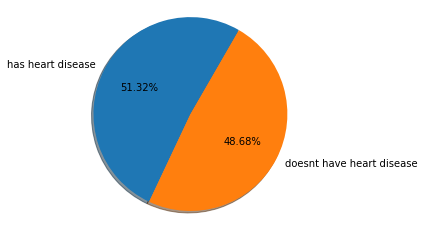

In [ ]:
labels = "has heart disease", "doesnt have heart disease"
explode =(0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(df.target.value_counts(), explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=60)
ax1.axis('equal')
plt.show()


In [ ]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

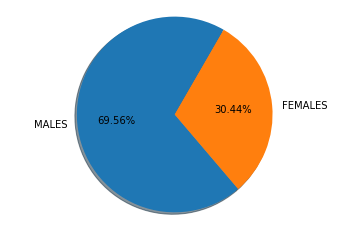

In [ ]:
labels = "MALES", "FEMALES"
explode=(0,0)
fig1,ax1=plt.subplots()
ax1.pie(df.sex.value_counts(), explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=60)
ax1.axis('equal')
plt.show()

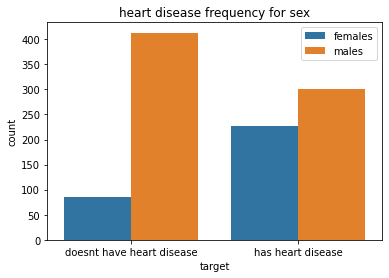

In [ ]:
fig = sns.countplot(x='target',data=df,hue='sex')
fig.set_xticklabels(labels=["doesnt have heart disease",'has heart disease'],rotation=0)
plt.legend(['females','males'])
plt.title("heart disease frequency for sex");

## Conclusion:
#### From the above graph we can conclude that most of the males were  suffering with heart disease. 
#### A very few in number of females doesnot have the heart disease.
#### This tells people around the world are suffering with heart diseases in huge number.



## Thank You